In [328]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold

In [329]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

In [330]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import math as math

In [331]:
# Importamos el dataset que trabajamos en el checkpoint 1
reservas = pd.read_csv('/content/sample_data/hoteles_limpio.csv')

In [332]:
# Importamos el dataset de test
test = pd.read_csv('/content/sample_data/hotels_test.csv')

In [333]:
reservas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58590 entries, 0 to 58589
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      58590 non-null  int64  
 1   hotel                           58590 non-null  object 
 2   lead_time                       58590 non-null  int64  
 3   arrival_date_year               58590 non-null  int64  
 4   arrival_date_month              58590 non-null  object 
 5   arrival_date_week_number        58590 non-null  int64  
 6   arrival_date_day_of_month       58590 non-null  int64  
 7   stays_in_weekend_nights         58590 non-null  int64  
 8   stays_in_week_nights            58590 non-null  int64  
 9   adults                          58590 non-null  int64  
 10  children                        58590 non-null  float64
 11  babies                          58590 non-null  int64  
 12  meal                            

# Preprocesamiento de los datasets

borramos columnas asi queda igual a nuestro dataset de train.

In [334]:
test = test.drop(columns = ['reservation_status_date','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal'])
reservas = reservas.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal'])

## igualacion Dummies variable Country

In [335]:
reservas_c = (sorted(reservas["country"].dropna().unique()))
test_c = (sorted(test["country"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [336]:
reservas_limpio = pd.get_dummies(reservas, columns=["country"], drop_first=True, dtype='int64')

In [337]:
for country in paises_no_train:

  reservas_limpio["country_" + country] = np.int64(0)

In [338]:
test_limpio = pd.get_dummies(test, columns=["country"], drop_first=True, dtype='int64')

In [339]:
for country in paises_no_test:

  test_limpio["country_" + country] = np.int64(0)

In [340]:
reservas_limpio = reservas_limpio.drop(columns = 'Unnamed: 0')

In [341]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [342]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable hotel

In [343]:
reservas_h = (sorted(reservas_limpio["hotel"].dropna().unique()))
test_h = (sorted(test_limpio["hotel"].dropna().unique()))
paises_no_test = list(set(reservas_h) - set(test_h))
paises_no_train = list(set(test_h) - set(reservas_h))


In [344]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [345]:
for hotel in paises_no_train:
  hotel_ = hotel.replace(" ","_")
  reservas_limpio["hotel_" + hotel_] = np.int64(0)

In [346]:
test_limpio = pd.get_dummies(test_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [347]:
for hotel in paises_no_test:
  hotel_ = hotel.replace(" ","_")
  test_limpio["hotel_" + hotel_] = np.int64(0)

In [348]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [349]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable market_segment

In [350]:
reservas_c = (sorted(reservas_limpio["market_segment"].dropna().unique()))
test_c = (sorted(test_limpio["market_segment"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [351]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [352]:
for market_segment in paises_no_train:

  reservas_limpio["market_segment_" + market_segment] = np.int64(0)

In [353]:
test_limpio = pd.get_dummies(test_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [354]:
for market_segment in paises_no_test:

  test_limpio["market_segment_" + market_segment] = np.int64(0)

In [355]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [356]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable distribution_channel

In [357]:
reservas_c = (sorted(reservas_limpio["distribution_channel"].dropna().unique()))
test_c = (sorted(test_limpio["distribution_channel"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [358]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [359]:
for distribution_channel in paises_no_train:

  reservas_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [360]:
test_limpio = pd.get_dummies(test_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [361]:
for distribution_channel in paises_no_test:

  test_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [362]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [363]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable reserved_room_type

In [364]:
reservas_c = (sorted(reservas_limpio["reserved_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["reserved_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [365]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [366]:
for reserved_room_type in paises_no_train:

  reservas_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [367]:
test_limpio = pd.get_dummies(test_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [368]:
for reserved_room_type in paises_no_test:

  test_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [369]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [370]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable assigned_room_type

In [371]:
reservas_c = (sorted(reservas_limpio["assigned_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["assigned_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [372]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [373]:
for assigned_room_type in paises_no_train:

  reservas_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [374]:
test_limpio = pd.get_dummies(test_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [375]:
for assigned_room_type in paises_no_test:

  test_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [376]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [377]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable deposit_type

In [378]:
reservas_c = (sorted(reservas_limpio["deposit_type"].dropna().unique()))
test_c = (sorted(test_limpio["deposit_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [379]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [380]:
for deposit_type in paises_no_train:

  reservas_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [381]:
test_limpio = pd.get_dummies(test_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [382]:
for deposit_type in paises_no_test:

  test_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [383]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [384]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable customer_type

In [385]:
reservas_c = (sorted(reservas_limpio["customer_type"].dropna().unique()))
test_c = (sorted(test_limpio["customer_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [386]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [387]:
for customer in paises_no_train:

  reservas_limpio["customer_type_" + customer] = np.int64(0)

In [388]:
test_limpio = pd.get_dummies(test_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [389]:
for customer in paises_no_test:

  test_limpio["customer_type_" + customer] = np.int64(0)

In [390]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [391]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# Preprocesamiento para entrenar

Devolvemos solo las columnas int y float para poder entrenar el modelo. De esta forma podemos revisar si hicimos dummies para todas las variables categoricas, ya que estos pasan a ser de tipo de dato numerico.

In [392]:
reservas_sin_cuali = reservas_limpio[reservas_limpio.select_dtypes(include=["int64","float"]).columns.to_list()].copy()

In [393]:
test_sin_cuali = test_limpio[test_limpio.select_dtypes(include=["int","float"]).columns.to_list()].copy()

Ordenamos las columnas de train y test para que queden de igual forma las columnas. Si estan en diferente orden tira error.

In [394]:
reservas_sin_cuali = reservas_sin_cuali.reindex(sorted(reservas_sin_cuali.columns), axis=1)
test_sin_cuali = test_sin_cuali.reindex(sorted(test_sin_cuali.columns), axis=1)

In [395]:
# hacemos lo mismo que en el dataset de train de poner -1 a los valores faltantes de estas columnas para asignarlas a una categoria nula.
# De esta forma podemos identificarlos
test_sin_cuali['agent'] = test_sin_cuali['agent'].fillna(-1)
test_sin_cuali['company'] = test_sin_cuali['company'].fillna(-1)

eliminamos la columna target del dataset para entrenar y hacemos uno solo con esta.

In [396]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

# Probamos con un RandomizedSearchCV para buscar hiperparametros

Probamos con distinta cantidad de folds para ver cual devuelve mejor puntaje.

In [397]:
score = pd.DataFrame()
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(a, b, test_size=0.2, random_state=42)

for k in range(2, 10):


  n=10
  params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}


  folds=k


  kfoldcv = StratifiedKFold(n_splits=folds)


  base_tree = DecisionTreeClassifier()

  scorer_fn = make_scorer(f1_score)

  randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

  randomcv.fit(X_train_random, y_train_random);

  new_row = {'fold': k, "score": randomcv.best_score_, "best_params": randomcv.best_params_}
  score = score.append(new_row, ignore_index=True)

<ipython-input-397-0f89b1388a7e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-397-0f89b1388a7e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-397-0f89b1388a7e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-397-0f89b1388a7e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-397-0f89b1388a7e>:32: FutureWarning: The frame.append method is deprecated and will be removed from p

In [398]:
score.head(10)

,fold,score,best_params
0,2,0.779765,"{'max_depth': 4, 'criterion': 'gini', 'ccp_alp..."
1,3,0.684338,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
2,4,0.788940,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
3,5,0.789079,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
4,6,0.779504,"{'max_depth': 4, 'criterion': 'gini', 'ccp_alp..."
5,7,0.789183,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
6,8,0.772683,"{'max_depth': 5, 'criterion': 'gini', 'ccp_alp..."
7,9,0.779402,"{'max_depth': 5, 'criterion': 'gini', 'ccp_alp..."


In [399]:
score[score['score'].max() == score['score']]

,fold,score,best_params
5,7,0.789183,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."


con 3 folds devuelve el mejor score

In [400]:
print(randomcv.best_params_)

{'max_depth': 5, 'criterion': 'gini', 'ccp_alpha': 0.011111111111111112}


In [401]:
tree_model = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 5,
                                         ccp_alpha=0.055555555555)

model_random = tree_model.fit(X_train_random, y_train_random)

In [402]:
y_pred_random = model_random.predict(X_test_random)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_random, y_pred_random)
precision = precision_score(y_test_random, y_pred_random)
recall = recall_score(y_test_random, y_pred_random)
f1 = f1_score(y_test_random, y_pred_random)
roc_auc = roc_auc_score(y_test_random, y_pred_random)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.6551459293394777
Precisión: 0.9978471474703983
Recuperación: 0.31471736547275503
F1-Score: 0.478513356562137
AUC-ROC: 0.6570154529440316


Text(50.722222222222214, 0.5, 'True')

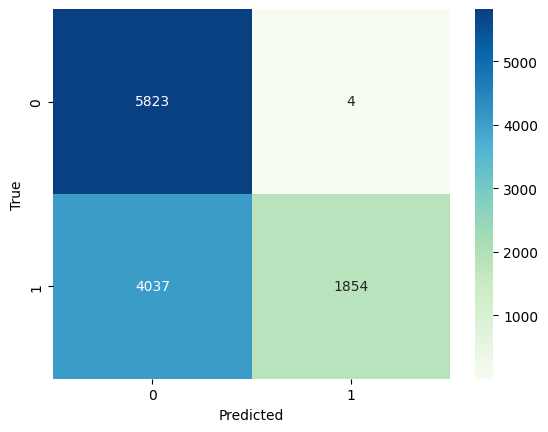

In [403]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_random, y_pred_random)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

predecimos con datset de test para subir la primer prediccion a kaggel

In [404]:
y_pred_random = randomcv.predict(test_sin_cuali)

In [405]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_random})

In [406]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [407]:
prediccion.to_csv('/content/sample_data/prediccion_random.csv', index = False)

# GridSearchCV

Queremos hacer otra prueba con GridSearchCV

Le pasamos 3 como valor de folds

In [408]:
from sklearn.model_selection import GridSearchCV

In [409]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(a, b, test_size=0.2, random_state=42)

n=10

param_grid = {
    'criterion': ['gini', 'entropy'],           # Criterio de división del árbol (Gini o entropía)
    'splitter': ['best', 'random'],             # Estrategia de división de nodos (mejor o aleatorio)
    'max_depth': [None, 10, 20, 30, 40, 50],    # Profundidad máxima del árbol (None para ilimitada)
    'min_samples_split': [2, 5, 10],            # Mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],              # Mínimo de muestras requeridas en una hoja del árbol
    'max_features': ['auto', 'sqrt', 'log2']    # Número máximo de características a considerar en cada división
}

folds=3

kfoldcv = StratifiedKFold(n_splits=folds)

base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

gridcv = GridSearchCV(estimator=base_tree ,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True', n_jobs=-1)

gridcv.fit(X_train_grid, y_train_grid);

In [410]:
print(gridcv.best_params_)

print(gridcv.best_score_)

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5}
0.78849127909219


In [411]:
tree_model = DecisionTreeClassifier(criterion="gini",
                                         max_depth = 5,
                                         ccp_alpha=0.0)

model_grid = tree_model.fit(X_train_grid, y_train_grid)

In [412]:
y_pred_grid = model_grid.predict(X_test_grid)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_grid, y_pred_grid)
precision = precision_score(y_test_grid, y_pred_grid)
recall = recall_score(y_test_grid, y_pred_grid)
f1 = f1_score(y_test_grid, y_pred_grid)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.7918586789554531
Precisión: 0.8033391915641477
Recuperación: 0.7759293838058055
F1-Score: 0.7893964251791727
AUC-ROC: 0.791946157494116


Podemos ver todos los scores

Text(50.722222222222214, 0.5, 'True')

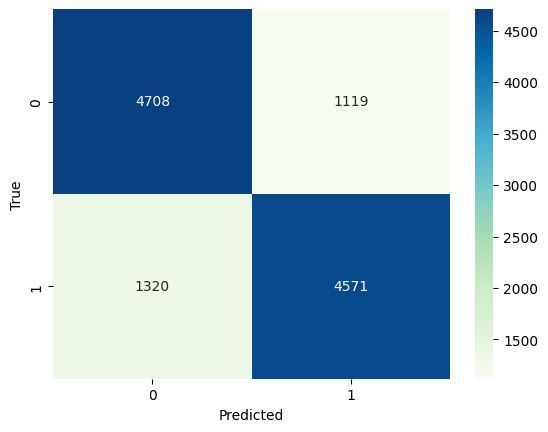

In [413]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Vemos que gridSearch predice mejor que random seach.

Lo guardamos en un dataset para subir a kaggel.

In [414]:
y_pred_grid = gridcv.predict(test_sin_cuali)

In [415]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_grid})

In [416]:
prediccion.to_csv('/content/sample_data/prediccion_grid.csv', index = False)

# Probamos ahora haciendo una normalizacion y balanceo en el dataset

In [417]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [418]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

In [419]:
b.value_counts()

0    29485
1    29105
Name: is_canceled, dtype: int64

Vemos que hay una proporcion cercana al 50% de cada una, por lo que en este caso el balanceo puede cambiar muy poco el resultado del score.

In [420]:
# Normalización Min-Max en los datos de entrenamiento
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(a)

In [421]:
# Balanceo de clases
class_0 = X_train_normalized[b == 0]
class_1 = X_train_normalized[b == 1]

In [422]:
# Balanceo de clases (sobremuestreo de la clase minoritaria)

# Selecciona los ejemplos de la clase mayoritaria (clase "0")
class_0 = X_train_normalized[b == 0]

# Selecciona los ejemplos de la clase minoritaria (clase "1")
class_1 = X_train_normalized[b == 1]

# Realiza sobremuestreo de la clase minoritaria (clase "1")
# - replace=True: Permite muestrear con reemplazo
# - n_samples=len(class_0): Genera tantas muestras de la clase "1" como ejemplos de la clase "0"
class_0_oversampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Combina los datos equilibrados en X_train_balanced y y_train_balanced
# - np.vstack: Apila verticalmente los arrays
# - np.hstack: Concatena horizontalmente los arrays
X_train_balanced = np.vstack((class_0, class_0_oversampled))
y_train_balanced = np.hstack((b[b == 0], np.ones(len(class_0))))

In [423]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_tree = DecisionTreeClassifier(random_state=42)

grid_search_2 = GridSearchCV(base_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_2.fit(X_train_grid, y_train_grid)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [424]:
print("Mejores hiperparámetros encontrados:", grid_search_2.best_params_)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [425]:
tree_model = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = None,
                                         min_samples_leaf =  1,
                                         min_samples_split = 2)

model_grid_2 = tree_model.fit(X_train_grid, y_train_grid)

In [426]:
y_pred_grid_2 = model_grid_2.predict(X_test_grid)

accuracy = accuracy_score(y_test_grid, y_pred_grid_2)
precision = precision_score(y_test_grid, y_pred_grid_2)
recall = recall_score(y_test_grid, y_pred_grid_2)
f1 = f1_score(y_test_grid, y_pred_grid_2)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid_2)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.8846023401729693
Precisión: 0.8674059787849566
Recuperación: 0.9096578459464015
F1-Score: 0.8880296174413822
AUC-ROC: 0.8844484418266387


Text(50.722222222222214, 0.5, 'True')

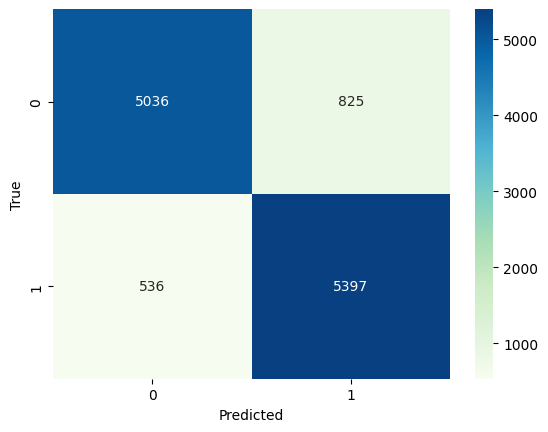

In [427]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid_2)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Podemos ver que aumentaron significativamente los scores comparando a los anteriores sin normalizacion y balanceo.

busquemos con cuantos folds nos da el mejor score, usando los hiperparametros encontrados anteriormente.

In [428]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

score_grid = pd.DataFrame()
for k in range(2, 10):

  param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
  }

  base_tree = DecisionTreeClassifier(random_state=42)

  grid_search = GridSearchCV(base_tree, param_grid, cv=k, scoring='accuracy', n_jobs=-1)


  grid_search.fit(X_train_grid, y_train_grid)

  new_row = {'fold': k, "score": grid_search.best_score_}
  score_grid = score_grid.append(new_row, ignore_index=True)

<ipython-input-428-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-428-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-428-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-428-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-428-7e62299a4321>:21: FutureWarning: The frame.append method 

In [429]:
score_grid.head(15)

,fold,score
0,2.0,0.849055
1,3.0,0.862366
2,4.0,0.867751
3,5.0,0.870506
4,6.0,0.871524
5,7.0,0.873961
6,8.0,0.873135
7,9.0,0.873622


In [430]:
score_grid[score_grid['score'].max() == score_grid['score']]

,fold,score
5,7.0,0.873961


Mejora mucho la prediccion

Generamos dataset para subir a kaggel

In [431]:
y_pred_grid_2 = grid_search.predict(test_sin_cuali)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [432]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_grid_2})

In [433]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1.0
1,aba9aac2-4495-4645-a60e-90328713c999,0.0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,1.0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0.0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1.0


In [434]:
prediccion.to_csv('/content/sample_data/prediccion_grid_hiperparametros_balanceo_normalizacion.csv', index = False)

# Queremos ver la diferencia de puntaje segun el hiperparametro scoring

Queremos ver cual score es el mejor para entrenar

Pasamos los mejores params_grid y 7 folds

In [435]:
score_types = pd.DataFrame()

lista_scorings = ['f1','accuracy','recall','precision','roc_auc','neg_log_loss','neg_mean_absolute_error','neg_mean_squared_error','r2']

X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

for k in lista_scorings:

  clf = DecisionTreeClassifier(random_state=42)

  param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
  }


  grid_search = GridSearchCV(clf, param_grid, cv=7, scoring=k, n_jobs=-1)

  grid_search.fit(X_train_grid, y_train_grid)

  y_pred = grid_search.predict(X_test_grid)

  new_row = {'scoring': k, "score": f1_score(y_test_grid, y_pred), "best_params": grid_search.best_params_}
  score_types = score_types.append(new_row, ignore_index=True)

<ipython-input-435-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-435-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-435-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-435-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-435-b421fecb08a7>:26: FutureWarning: The frame.append

In [436]:
score_types.head(10)

,scoring,score,best_params
0,f1,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,accuracy,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,recall,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
3,precision,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
4,roc_auc,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
5,neg_log_loss,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
6,neg_mean_absolute_error,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
7,neg_mean_squared_error,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
8,r2,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."


In [437]:
score_types[score_types['score'].max() == score_types['score']]

,scoring,score,best_params
0,f1,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,accuracy,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,recall,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
3,precision,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
4,roc_auc,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
5,neg_log_loss,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
6,neg_mean_absolute_error,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
7,neg_mean_squared_error,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."
8,r2,0.888944,"{'criterion': 'entropy', 'max_depth': None, 'm..."


con todos los scorings devuelve el mismo puntaje.

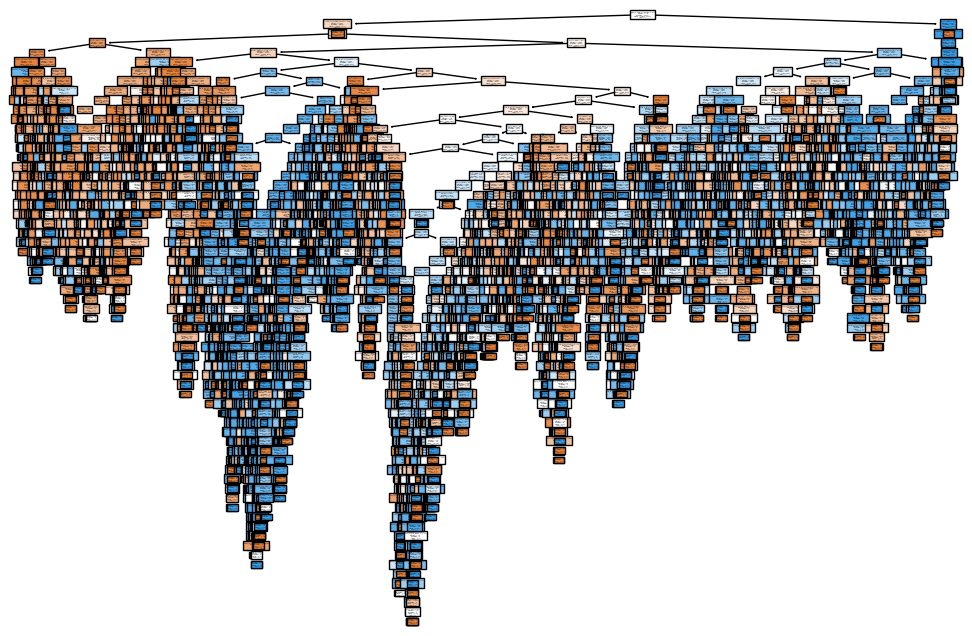

In [440]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_model = grid_search_2.best_estimator_


plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=a.columns, class_names=["0", "1"])
plt.show()

Mostramos un arbol representativo de los datos donde se pueda ver mejor.

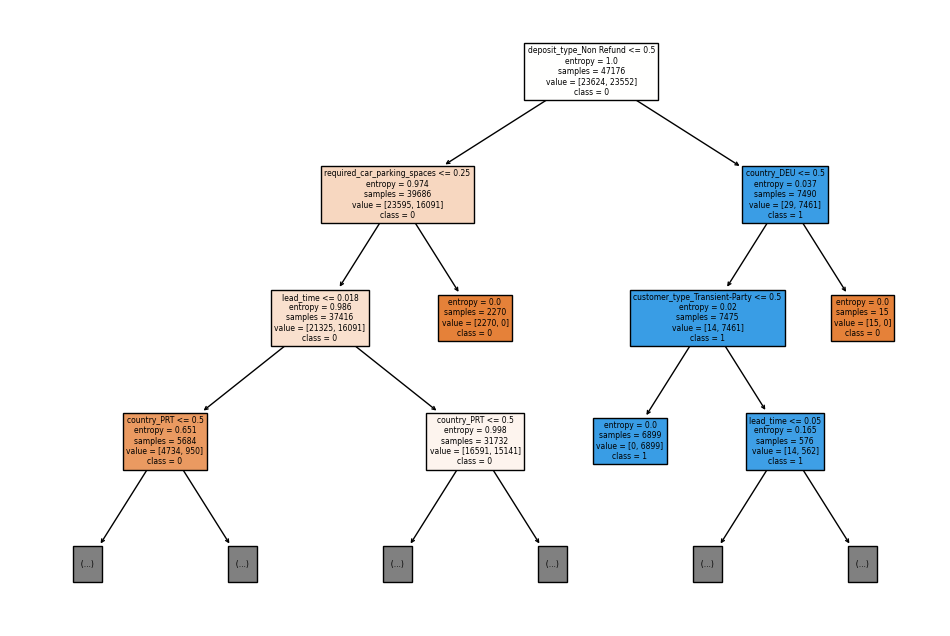

In [441]:
best_model = grid_search_2.best_estimator_


plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=a.columns, class_names=["0", "1"],max_depth=3)
plt.show()

